# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from matplotlib import pyplot as mp

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
lat = []
long = []
lat_longs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=10)
lngs = np.random.uniform(low=-180.000, high=180.000, size=10)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
        lat_longs.append(lat_lng)
        type (lat_longs)

In [5]:
#Build the matrix of city and countries
city_country_pd = pd.DataFrame({"City":cities, "Country": countries, "Latitude and Longitude":lat_longs})
print(city_country_pd)
#Print the city count to confirm sufficient count
len(cities)

              City Country                     Latitude and Longitude
0             lebu      cl   (-34.820109397505746, -92.5542096105621)
1           atuona      pf   (-6.17986276874997, -121.32075466066124)
2      tuktoyaktuk      ca   (86.24870646205483, -122.94878930586677)
3         cherskiy      ru     (71.9154115667998, 163.09899769984213)
4       diamantino      br  (-13.976493509584785, -56.03959783026919)
5        tuatapere      nz   (-49.27552720561519, 159.31238842344823)
6        nishihara      jp   (20.988098966680823, 131.98868652119216)
7        hay river      ca   (63.56740100438128, -117.74836838617394)
8          lesnoye      ru     (58.14170769286724, 35.80770285373811)
9  arraial do cabo      br   (-54.6943937942028, -20.180011919650866)


10

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
## Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Set up response lists
cloudiness = []
date = []
humidity = []
max_temp = []
wind_speed = []
city_id = []
latitude = []
longitude = []

#Find the weather for each city
for city in cities:
    # Get weather data, skip if the city name does not exist
    #try:
    response = requests.get(query_url + city).json()
    print(response)
    cloudiness.append(response['clouds']['all']) 
    humidity.append(response['main']['humidity'])       
    max_temp.append(response['main']['temp_max'])        
    wind_speed.append(response['wind']['speed'])     
    city_id.append(response['id'])      
    date.append(response['dt']) 
    latitude.append(response['coord']['lat'])
    longitude.append(response['coord']['lat'])
    #except(KeyError,IndexError):
    print(f"missing city", city, "skip")
    #print(city, city_id)

{'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 9.26, 'pressure': 1014.02, 'humidity': 91, 'temp_min': 9.26, 'temp_max': 9.26, 'sea_level': 1014.02, 'grnd_level': 769.56}, 'wind': {'speed': 1.76, 'deg': 316}, 'clouds': {'all': 24}, 'dt': 1551818155, 'sys': {'message': 0.0035, 'country': 'ET', 'sunrise': 1551757009, 'sunset': 1551800171}, 'id': 344979, 'name': 'Lebu', 'cod': 200}
missing city lebu skip
{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.06, 'pressure': 1009.82, 'humidity': 100, 'temp_min': 28.06, 'temp_max': 28.06, 'sea_level': 1009.82, 'grnd_level': 1009.8}, 'wind': {'speed': 8.51, 'deg': 83.0001}, 'clouds': {'all': 0}, 'dt': 1551818125, 'sys': {'message': 0.0035, 'country': 'PF', 'sunrise': 1551799205, 'sunset': 1551843269}, 'id': 4020109, '

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
city_file_df =pd.DataFrame({"City":cities, "City ID": city_id,"Date":date, "Max Temperature":max_temp, 
             "Cloudiness":cloudiness, "Humidity":humidity, "Wind Speed":wind_speed, 
            "Latitude":latitude, "Longitude":longitude})
city_file_df.head()
city_file.to_csv(city)


,City,City ID,Date,Max Temperature,Cloudiness,Humidity,Wind Speed,Latitude,Longitude
0,lebu,344979,1551818155,9.26,24,91,1.76,8.96,8.96
1,atuona,4020109,1551818125,28.06,0,100,8.51,-9.80,-9.80
2,tuktoyaktuk,6170031,1551816000,-13.00,5,84,4.60,69.44,69.44
3,cherskiy,2126199,1551818206,-18.52,80,68,1.46,68.75,68.75
4,diamantino,3464724,1551818206,28.04,64,73,1.86,-14.40,-14.40


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

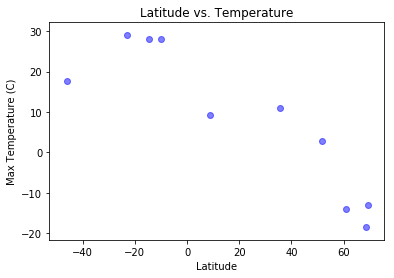

<Figure size 432x288 with 0 Axes>

In [68]:
#Scatterplot of Latitude vs Temp
y = city_file_df['Max Temperature']
x = city_file_df['Latitude']
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="blue")

#add legend
plt.title("Latitude vs. Temperature")
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.show()
mp.savefig('Lat_vs_temp.png')

#### Latitude vs. Humidity Plot

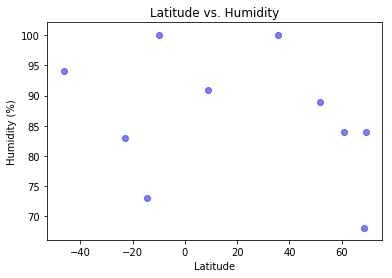

<Figure size 432x288 with 0 Axes>

In [69]:
#Scatterplot of Latitude vs Humidity
y = city_file_df['Humidity']
x = city_file_df['Latitude']
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50,color="blue")

#add legend
plt.title("Latitude vs. Humidity")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.show()
mp.savefig('Lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

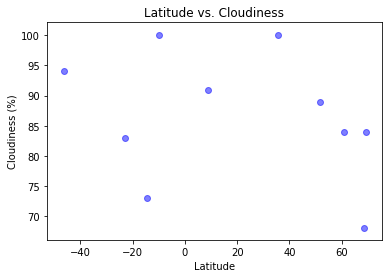

<Figure size 432x288 with 0 Axes>

In [70]:
#Scatterplot of Latitude vs Cloudiness
y = city_file_df['Humidity']
x = city_file_df['Latitude']
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="blue")

#add legend
plt.title("Latitude vs. Cloudiness")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.show()
mp.savefig('Lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

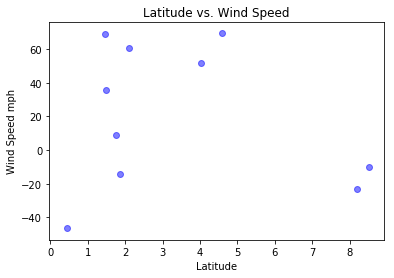

<Figure size 432x288 with 0 Axes>

In [71]:
#Scatterplot of Latitude vs Wind Speed
y = city_file_df['Latitude']
x = city_file_df['Wind Speed']
for i in range (len(city_file_df)):
        
    #plot each dot
    plt.scatter(x.loc[i],y.loc[i], alpha=0.50, color="blue")

#add legend
plt.title("Latitude vs. Wind Speed")
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.show()
mp.savefig('Lat_vs_windspeed.png')